In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_model1():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_model2():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [1]:
import os

# Set the root directory
root_dir = r'C:\Users\kowsh\Desktop\main project\dataset\plantVillageDataset'

# List all immediate subdirectories (class names)
class_names = [dirname for dirname in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, dirname))]

# Print the class names
for class_name in class_names:
    
    print(class_name)

color
grayscale
segmented


In [2]:
from tqdm import tqdm
from pathlib import Path
import pandas as pd

def data(dataset_path):
    images = []
    labels = []
    dataset_path = Path(dataset_path)
    
    for subfolder in tqdm(dataset_path.iterdir(), desc="Processing Subfolders"):
        if subfolder.is_dir():
            for image_file in subfolder.iterdir():
                if image_file.is_file():
                    images.append(str(image_file))
                    labels.append(subfolder.name)
    
    df = pd.DataFrame({'image': images, 'label': labels})
    return df


In [3]:
color_path = r'C:\Users\kowsh\Desktop\main project\dataset\plantVillageDataset\color'
train_color = data(color_path)
print(train_color.shape)
train_color.label.value_counts().to_frame()
num_classes = train_color['label'].nunique()
print(f"Number of classes: {num_classes}")

Processing Subfolders: 4it [00:00,  4.77it/s]

(3172, 2)
Number of classes: 4


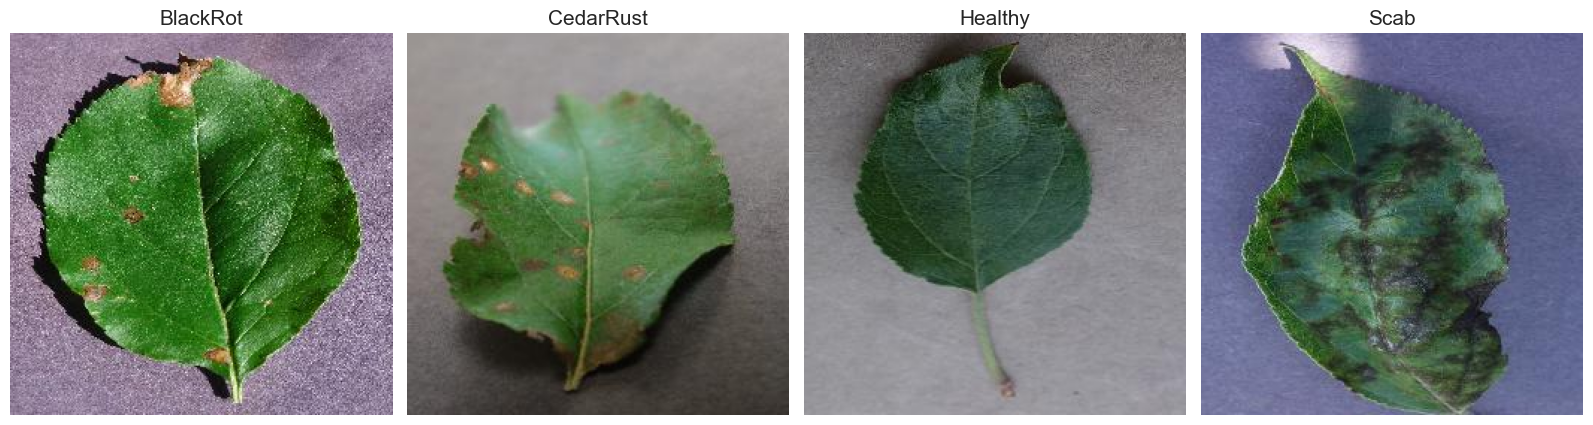

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List all immediate subdirectories (class names)
class_names = [dirname for dirname in os.listdir(color_path) if os.path.isdir(os.path.join(color_path, dirname))]

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 20))

# Loop through each class
for idx, class_name in enumerate(class_names):
    # Get the path to the class directory
    class_dir = os.path.join(color_path, class_name)
    
    # List all images in the class directory
    image_files = [file for file in os.listdir(class_dir) if file.endswith(('.png', '.jpg', 'JPG', '.jpeg'))]
    
    if not image_files:
        continue  # Skip if no images are found in the class folder
    
    # Randomly select an image
    random_image = np.random.choice(image_files)
    
    # Load the image
    img_path = os.path.join(class_dir, random_image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.subplot(len(class_names) // 5 + 1, 5, idx + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_name, fontsize=15)

plt.tight_layout()
plt.show()

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
X_train, X_test1, y_train, y_test1 = train_test_split(train_color['image'], train_color['label'], test_size=0.2, random_state=42,shuffle=True,stratify=train_color['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
image_size = (224, 224)
batch_size = 32

# Base ImageDataGenerator for rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Train ImageDataGenerator with Data Augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generators for training, testing, and validation
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'  # Ensure correct class_mode for multi-class problems
)

test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'  # Ensure correct class_mode for multi-class problems
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'  # Ensure correct class_mode for multi-class problems
)


Found 2536 validated image filenames belonging to 4 classes.
Found 318 validated image filenames belonging to 4 classes.
Found 317 validated image filenames belonging to 4 classes.


C:\Users\kowsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [13]:
def train_boosted_models_no_weights(n_models=3):
    models = []
    histories = []
    
    df_train_boost = df_train.copy()  # start with original data

    for i in range(n_models):
        print(f"\nTraining Boosting Model {i+1}")

        # New generator from modified dataframe
        train_gen = train_datagen.flow_from_dataframe(
            dataframe=df_train_boost,
            x_col='image',
            y_col='label',
            target_size=image_size,
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )

        model = create_cnn_model()
        history = model.fit(train_gen, validation_data=val_generator, epochs=5, verbose=1)

        models.append(model)
        histories.append(history)

        # Predict on current training set
        preds = model.predict(train_gen, verbose=0)
        pred_labels = np.argmax(preds, axis=1)
        true_labels = train_gen.classes

        # Find misclassified
        misclassified_idx = np.where(pred_labels != true_labels)[0]
        misclassified_df = df_train_boost.iloc[misclassified_idx]

        # Duplicate misclassified samples for next round
        df_train_boost = pd.concat([df_train, misclassified_df], ignore_index=True)

    return models, histories


In [14]:
import matplotlib.pyplot as plt

def plot_histories(histories):
    for i, history in enumerate(histories):
        plt.figure(figsize=(12, 5))
        
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Acc')
        plt.plot(history.history['val_accuracy'], label='Val Acc')
        plt.title(f'Boosting Model {i+1} Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'Boosting Model {i+1} Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def boosting_predict(models, test_generator, train_generator):
    # Predict on test
    test_preds = [model.predict(test_generator, verbose=0) for model in models]
    avg_test_preds = np.mean(test_preds, axis=0)
    final_test_preds = np.argmax(avg_test_preds, axis=1)
    true_test_labels = test_generator.classes

    
    # Accuracy scores
    test_acc = accuracy_score(true_test_labels, final_test_preds)
    
    print("\n--- Boosting Ensemble Evaluation ---")
    
    print(f" Test Accuracy : {test_acc * 100:.2f}%\n")

    # Classification Report (on test set)
    print(classification_report(true_test_labels, final_test_preds, target_names=list(test_generator.class_indices.keys())))

    # Confusion Matrix (on test set)
    cm = confusion_matrix(true_test_labels, final_test_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
    plt.figure(figsize=(10, 8))
    disp.plot(cmap='Oranges', xticks_rotation=45)
    plt.title('Confusion Matrix - Boosting (Test Set)')
    plt.grid(False)
    plt.show()


In [16]:
boosted_models, boosting_histories = train_boosted_models_no_weights(n_models=3)


Training Boosting Model 1
Found 2536 validated image filenames belonging to 4 classes.


C:\Users\kowsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/5


80/80 [==============================] - 91s 1s/step - loss: 0.7703 - accuracy: 0.7106 - val_loss: 0.2957 - val_accuracy: 0.9211
Epoch 2/5
80/80 [==============================] - 77s 958ms/step - loss: 0.3385 - accuracy: 0.8766 - val_loss: 0.2011 - val_accuracy: 0.9306
Epoch 3/5
80/80 [==============================] - 87s 1s/step - loss: 0.2432 - accuracy: 0.9089 - val_loss: 0.1381 - val_accuracy: 0.9558
Epoch 4/5
80/80 [==============================] - 83s 1s/step - loss: 0.1873 - accuracy: 0.9282 - val_loss: 0.1060 - val_accuracy: 0.9653
Epoch 5/5
80/80 [==============================] - 84s 1s/step - loss: 0.1715 - accuracy: 0.9405 - val_loss: 0.0887 - val_accuracy: 0.9653

Training Boosting Model 2
Found 4181 validated image filenames belonging to 4 classes.


C:\Users\kowsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/5
131/131 [==============================] - 152s 1s/step - loss: 0.6915 - accuracy: 0.7436 - val_loss: 0.2191 - val_accuracy: 0.9274
Epoch 2/5
131/131 [==============================] - 142s 1s/step - loss: 0.2562 - accuracy: 0.9105 - val_loss: 0.1637 - val_accuracy: 0.9558
Epoch 3/5
131/131 [==============================] - 159s 1s/step - loss: 0.1975 - accuracy: 0.9297 - val_loss: 0.1051 - val_accuracy: 0.9685
Epoch 4/5
131/131 [==============================] - 157s 1s/step - loss: 0.1560 - accuracy: 0.9407 - val_loss: 0.0975 - val_accuracy: 0.9685
Epoch 5/5
131/131 [==============================] - 161s 1s/step - loss: 0.1357 - accuracy: 0.9517 - val_loss: 0.0747 - val_accuracy: 0.9748

Training Boosting Model 3
Found 5269 validated image filenames belonging to 4 classes.


C:\Users\kowsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/5
165/165 [==============================] - 182s 1s/step - loss: 0.5288 - accuracy: 0.8015 - val_loss: 0.1779 - val_accuracy: 0.9401
Epoch 2/5
165/165 [==============================] - 176s 1s/step - loss: 0.2035 - accuracy: 0.9286 - val_loss: 0.1440 - val_accuracy: 0.9495
Epoch 3/5
165/165 [==============================] - 168s 1s/step - loss: 0.1619 - accuracy: 0.9446 - val_loss: 0.1083 - val_accuracy: 0.9653
Epoch 4/5
165/165 [==============================] - 164s 991ms/step - loss: 0.1450 - accuracy: 0.9489 - val_loss: 0.0714 - val_accuracy: 0.9779
Epoch 5/5
165/165 [==============================] - 170s 1s/step - loss: 0.1204 - accuracy: 0.9563 - val_loss: 0.0645 - val_accuracy: 0.9779


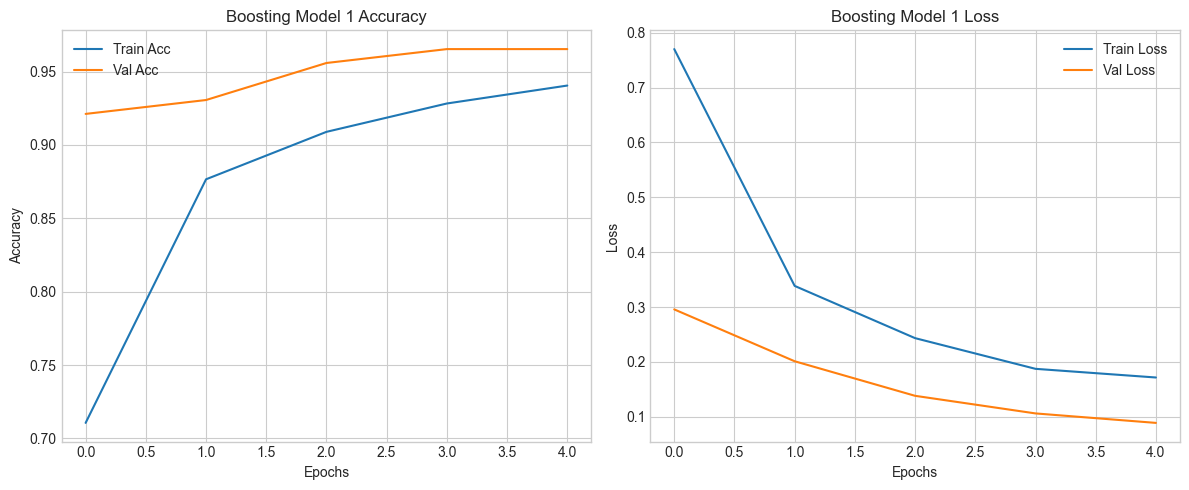

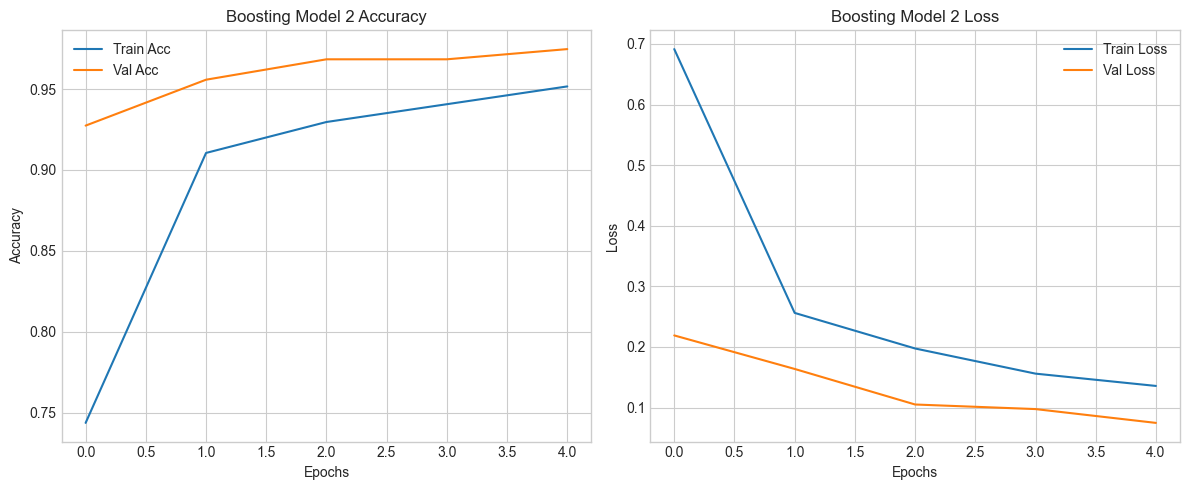

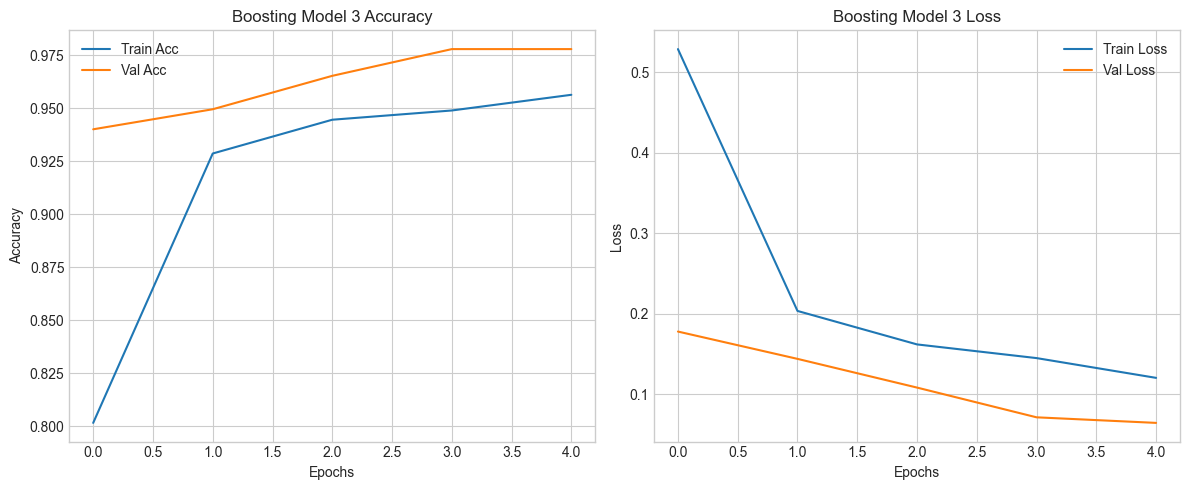

In [18]:

plot_histories(boosting_histories)




--- Boosting Ensemble Evaluation ---
 Test Accuracy : 98.11%

              precision    recall  f1-score   support

    BlackRot       1.00      1.00      1.00        63
   CedarRust       1.00      0.96      0.98        27
     Healthy       0.98      0.99      0.98       165
        Scab       0.97      0.95      0.96        63

    accuracy                           0.98       318
   macro avg       0.99      0.98      0.98       318
weighted avg       0.98      0.98      0.98       318



<Figure size 1000x800 with 0 Axes>

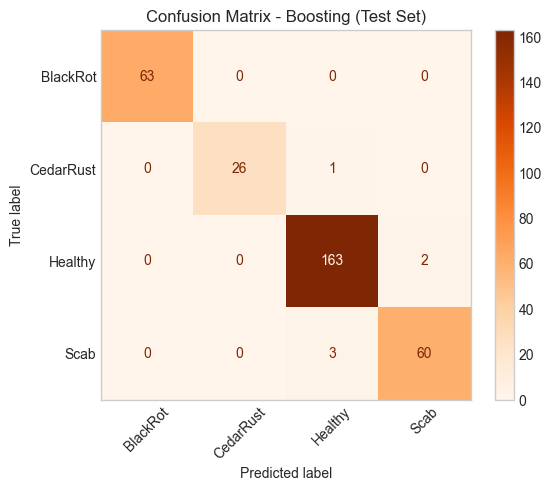

In [24]:
# Evaluate boosting on test set
boosting_predict(boosted_models, test_generator,train_generator)


In [34]:

best_train_accuracies = [max(history.history['accuracy']) for history in boosting_histories]


for i, acc in enumerate(best_train_accuracies, 1):
    print(f"Model {i} - Best Training Accuracy: {acc * 100:.2f}%")


best_overall = max(best_train_accuracies)
print(f"\n Best Training Accuracy among all boosted models: {best_overall * 100:.2f}%")


Model 1 - Best Training Accuracy: 94.05%
Model 2 - Best Training Accuracy: 95.17%
Model 3 - Best Training Accuracy: 95.63%

 Best Training Accuracy among all boosted models: 95.63%
